<a href="https://www.kaggle.com/code/mohammadz/example-of-cleaning-data-python-panda?scriptVersionId=118438186" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [3]:
import matplotlib.pyplot as plt


In [4]:
#Reading Data
df = pd.read_csv(
    '/kaggle/input/btc-eth-prices/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

#Cleaning non valid data, missing data

In [5]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

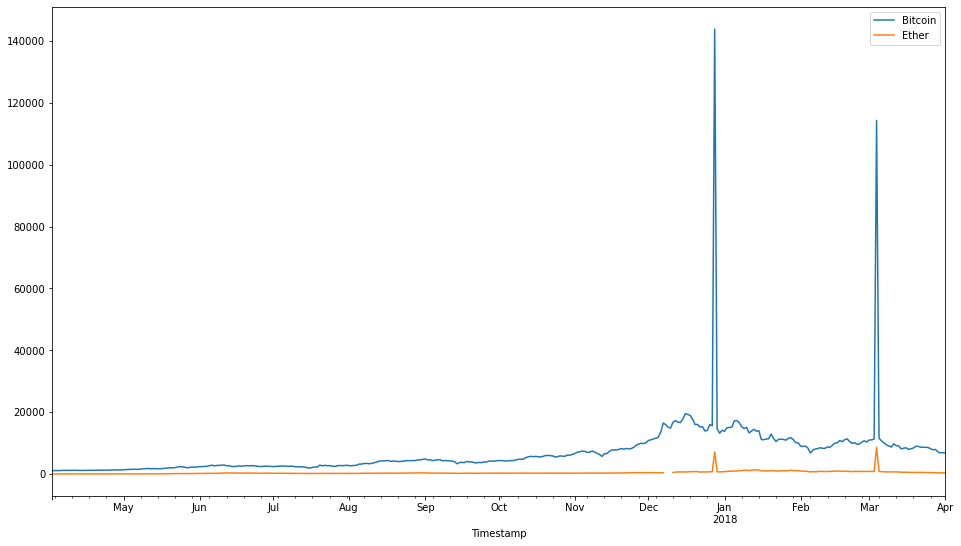

In [6]:
#Running simple Visualization
df.plot(figsize=(16,9))

1-There are some invalid values in both Eth and Btc reference to the huge spikes.


2-There are missing values between Dec and Jan in Eth.

<AxesSubplot:xlabel='Timestamp'>

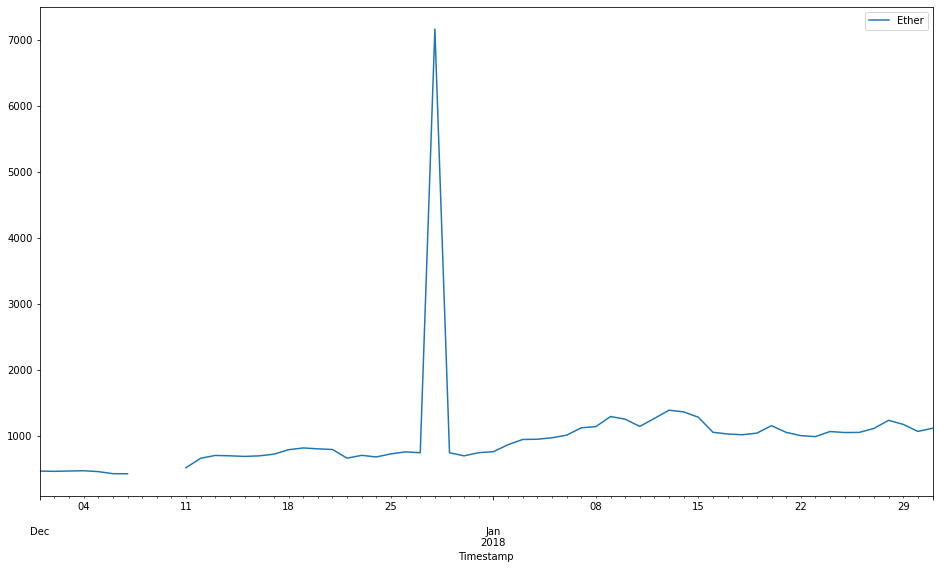

In [7]:
df.loc['2017-12':'2018-01'].plot(y='Ether',figsize=(16,9))

<AxesSubplot:xlabel='Timestamp'>

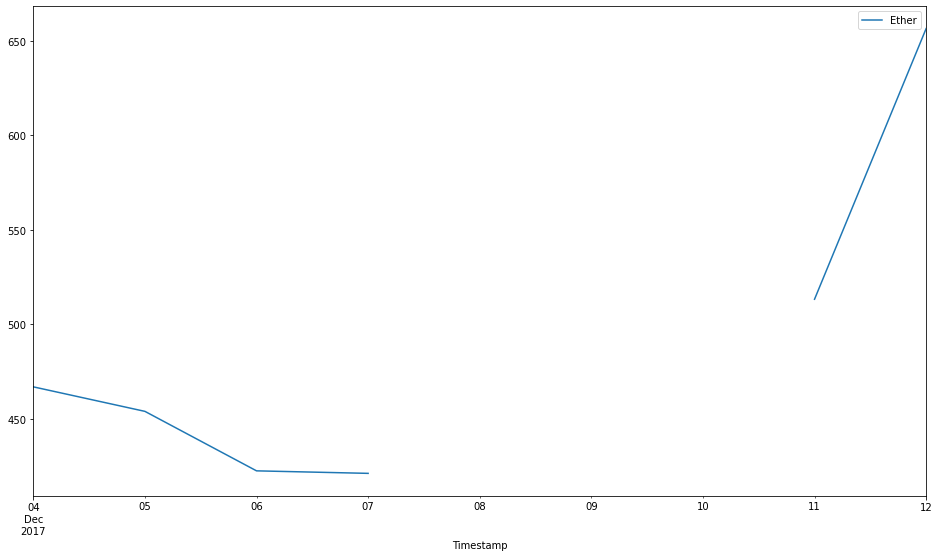

In [8]:
df.loc['2017-12-04':'2017-12-12'].plot(y='Ether',figsize=(16,9))

In [9]:
df_na=df.loc['2017-12-04':'2017-12-12']

In [10]:
# Finding Null values
df_na['Ether'].isna()

Timestamp
2017-12-04    False
2017-12-05    False
2017-12-06    False
2017-12-07    False
2017-12-08     True
2017-12-09     True
2017-12-10     True
2017-12-11    False
2017-12-12    False
Name: Ether, dtype: bool

In [11]:
df_na[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


We can fill the Null values with previous values as it will be show no change in price.

In [12]:
df1=df.fillna(method="ffill")

<AxesSubplot:xlabel='Timestamp'>

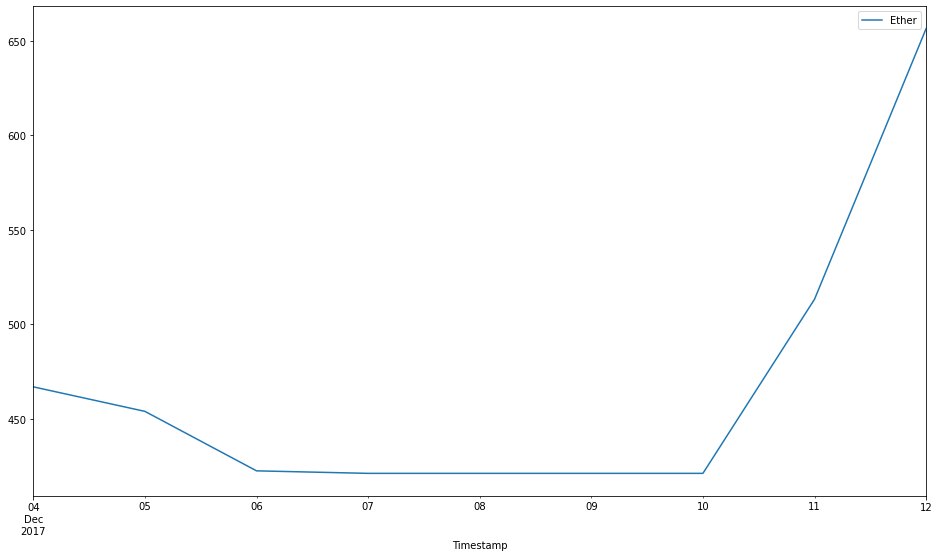

In [13]:
df1.loc['2017-12-04':'2017-12-12'].plot(y='Ether',figsize=(16,9))

<AxesSubplot:xlabel='Timestamp'>

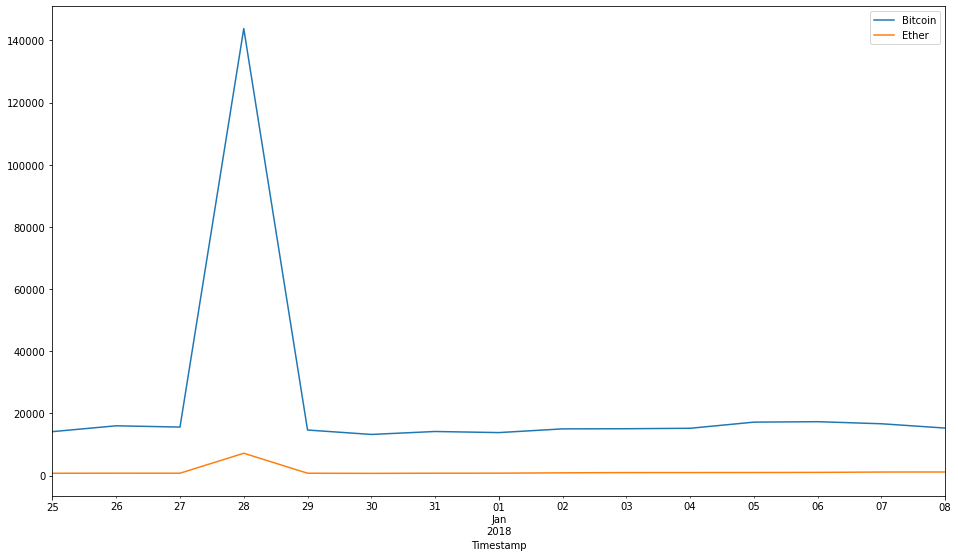

In [14]:
df1.loc['2017-12-25':'2018-01-08'].plot(figsize=(16,9))

It is clear that the spike date is 2017-12-28

<AxesSubplot:xlabel='Timestamp'>

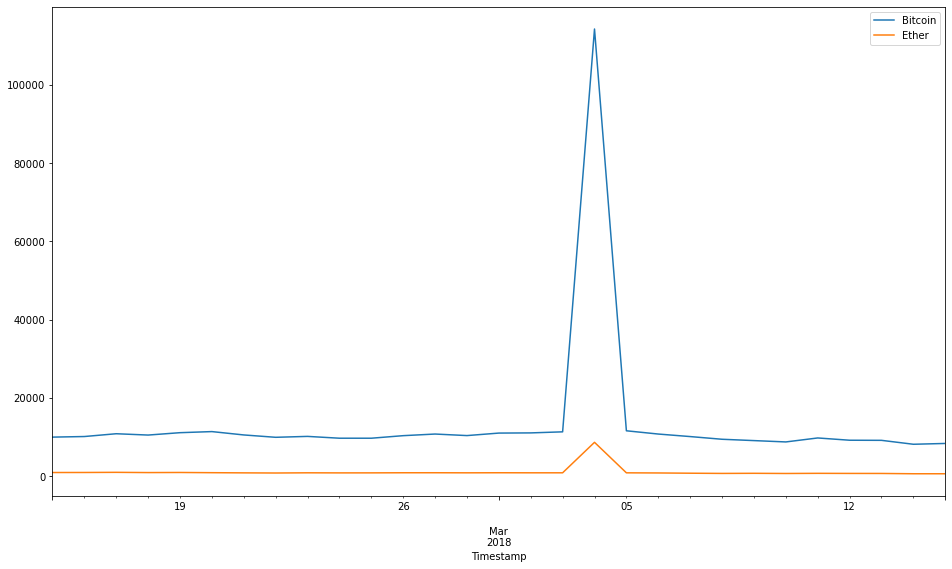

In [15]:
df1.loc['2018-02-15':'2018-03-15'].plot(figsize=(16,9))

The second spike at 2018-03-04

In [16]:
# Dropping spikes values
df_cleaned=df1.drop(['2017-12-28','2018-03-04'])

<AxesSubplot:xlabel='Timestamp'>

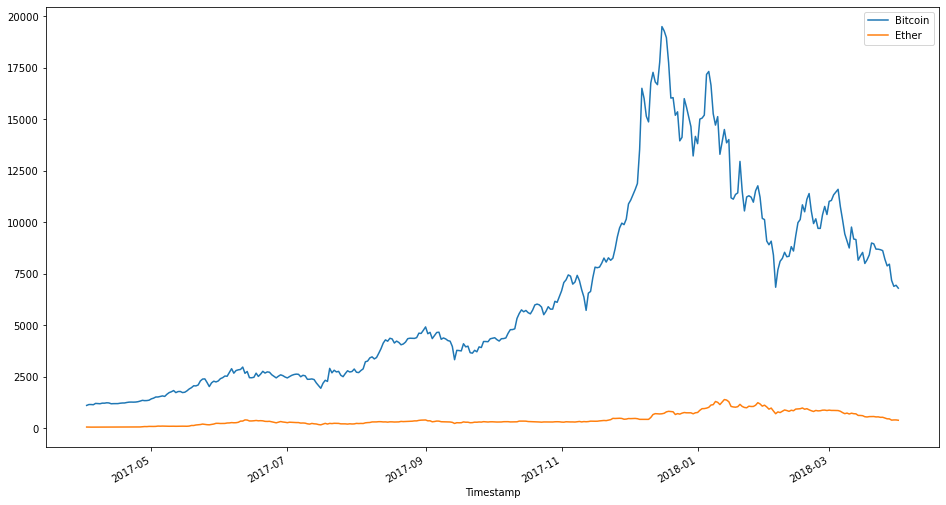

In [17]:
df_cleaned.plot(figsize=(16,9))

#Using Analytical ways to find outliers

mean
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers.But need to have knowledge with Data Domain.

In [18]:
df.mean()

Bitcoin    6996.004022
Ether       469.247072
dtype: float64

In [19]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       427.866915
dtype: float64

The original dataset has very high mean.

Let us check median

In [20]:
df.median()

Bitcoin    4594.98785
Ether       308.82500
dtype: float64

In [21]:
df_cleaned.median()

Bitcoin    4580.38748
Ether       309.32000
dtype: float64

Let us check mode

In [22]:
df.mode()

,Bitcoin,Ether
0,1099.169125,43.74
1,1133.079314,286.14
2,1141.600363,302.77
3,1141.813000,NaN
4,1180.023713,NaN
...,...,...
360,18961.856667,NaN
361,19289.785000,NaN
362,19498.683333,NaN
363,114301.816667,NaN


In [23]:
df_cleaned.mode()

,Bitcoin,Ether
0,1099.169125,421.15
1,1133.079314,NaN
2,1141.600363,NaN
3,1141.813000,NaN
4,1180.023713,NaN
...,...,...
358,17737.111667,NaN
359,17771.900000,NaN
360,18961.856667,NaN
361,19289.785000,NaN


Also no sense to use mode to check invalid values.

#Visulaising Distributions.

<AxesSubplot:ylabel='Frequency'>

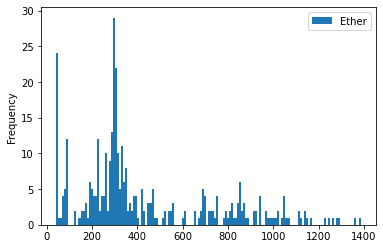

In [24]:
#Histogram Ether
df_cleaned.plot(kind='hist',y='Ether',bins=150)

<AxesSubplot:ylabel='Frequency'>

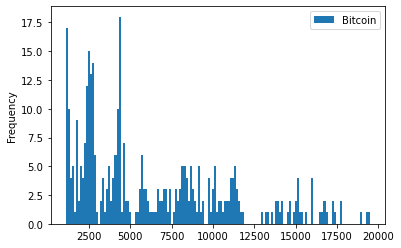

In [25]:
#Histogram Btc
df_cleaned.plot(kind='hist',y='Bitcoin',bins=150)

It did not indicate clearly invalid values

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ether', ylabel='Density'>

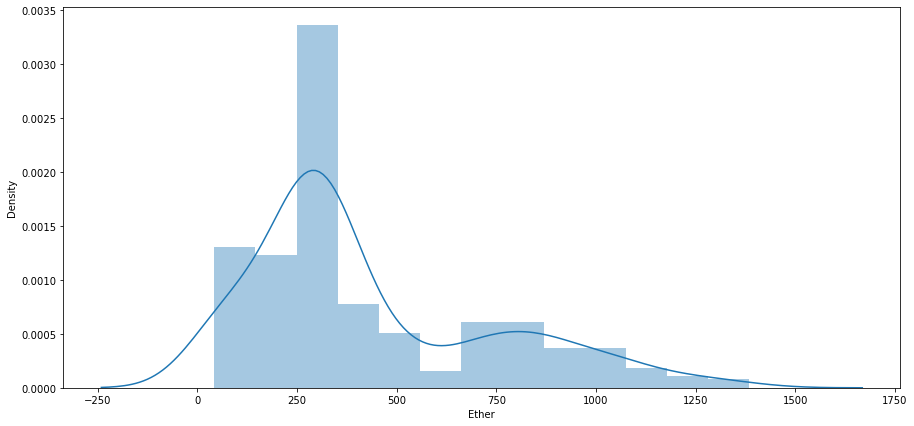

In [26]:
#Using seaborn
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bitcoin', ylabel='Density'>

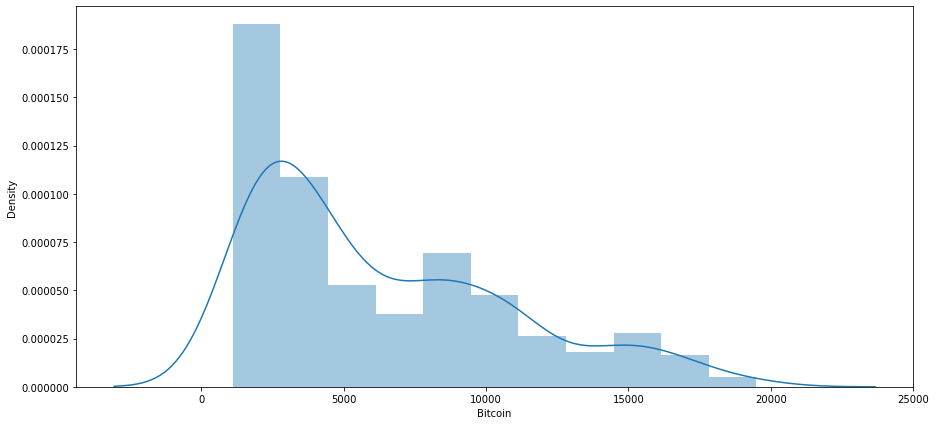

In [27]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bitcoin', ylabel='Density'>

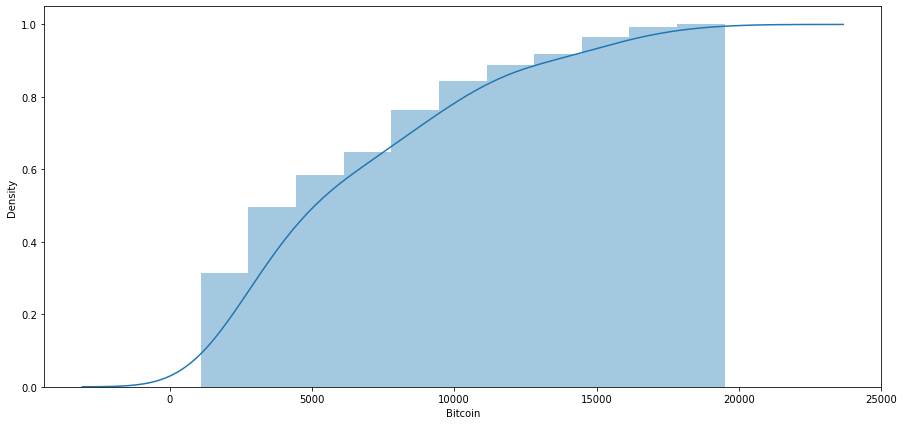

In [28]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bitcoin', ylabel='Density'>

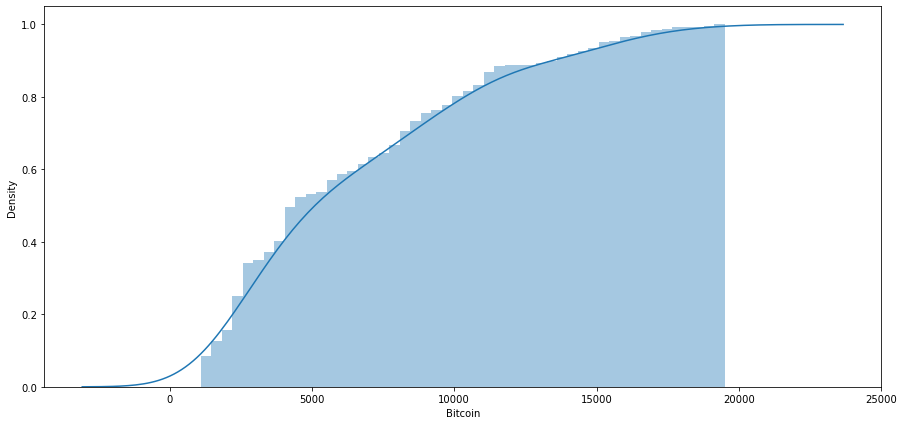

In [29]:
# Increase bins to make it more smooth
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))